In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
lats = np.random.uniform(-90.000, 90.000, size = 1500 )
lngs = np.random.uniform(-90.000, 90.000, size = 1500)
lats_lngs = zip(lats,lngs)
lats_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lats_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

636

In [6]:
import requests
from config import weath_apik
import time
from datetime import datetime

In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weath_apik

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
    
    # Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | praia
Processing Record 2 of Set 1 | hisor
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | lagoa
Processing Record 5 of Set 1 | grootfontein
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | kasganj
Processing Record 8 of Set 1 | saldanha
Processing Record 9 of Set 1 | port elizabeth
Processing Record 10 of Set 1 | xanxere
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | port alfred
Processing Record 13 of Set 1 | vila velha
Processing Record 14 of Set 1 | kruisfontein
Processing Record 15 of Set 1 | ponta do sol
Processing Record 16 of Set 1 | buenos aires
Processing Record 17 of Set 1 | milverton
Processing Record 18 of Set 1 | longyearbyen
Processing Record 19 of Set 1 | dikson
Processing Record 20 of Set 1 | east london
Processing Record 21 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 22 of

Processing Record 32 of Set 4 | sao felix do xingu
Processing Record 33 of Set 4 | comodoro rivadavia
Processing Record 34 of Set 4 | sault sainte marie
Processing Record 35 of Set 4 | tasiilaq
Processing Record 36 of Set 4 | pervomayskoye
Processing Record 37 of Set 4 | kem
Processing Record 38 of Set 4 | ciudad guayana
Processing Record 39 of Set 4 | cassilandia
Processing Record 40 of Set 4 | olafsvik
Processing Record 41 of Set 4 | marzuq
Processing Record 42 of Set 4 | manaure
Processing Record 43 of Set 4 | ladario
Processing Record 44 of Set 4 | imbituba
Processing Record 45 of Set 4 | gat
Processing Record 46 of Set 4 | matay
Processing Record 47 of Set 4 | turkistan
Processing Record 48 of Set 4 | meybod
Processing Record 49 of Set 4 | oshakati
Processing Record 50 of Set 4 | mollendo
Processing Record 1 of Set 5 | burica
City not found. Skipping...
Processing Record 2 of Set 5 | dingle
Processing Record 3 of Set 5 | bereda
Processing Record 4 of Set 5 | luanda
Processing Reco

Processing Record 26 of Set 8 | husavik
Processing Record 27 of Set 8 | mutsamudu
City not found. Skipping...
Processing Record 28 of Set 8 | paucartambo
City not found. Skipping...
Processing Record 29 of Set 8 | quepos
Processing Record 30 of Set 8 | sao gabriel da cachoeira
Processing Record 31 of Set 8 | nisia floresta
Processing Record 32 of Set 8 | primore
City not found. Skipping...
Processing Record 33 of Set 8 | kalmar
Processing Record 34 of Set 8 | mwense
Processing Record 35 of Set 8 | tall kayf
Processing Record 36 of Set 8 | lebowakgomo
Processing Record 37 of Set 8 | itaituba
Processing Record 38 of Set 8 | anar darreh
City not found. Skipping...
Processing Record 39 of Set 8 | porto velho
Processing Record 40 of Set 8 | baran
Processing Record 41 of Set 8 | robertsport
Processing Record 42 of Set 8 | teguise
Processing Record 43 of Set 8 | chocope
Processing Record 44 of Set 8 | betma
Processing Record 45 of Set 8 | colquiri
Processing Record 46 of Set 8 | grand gaube
P

Processing Record 13 of Set 12 | saqqez
Processing Record 14 of Set 12 | isabela
Processing Record 15 of Set 12 | morondava
Processing Record 16 of Set 12 | ordzhonikidze
Processing Record 17 of Set 12 | shatrovo
Processing Record 18 of Set 12 | oinacu
Processing Record 19 of Set 12 | rorvik
Processing Record 20 of Set 12 | micomeseng
Processing Record 21 of Set 12 | plettenberg bay
Processing Record 22 of Set 12 | corn island
Processing Record 23 of Set 12 | rheinbach
Processing Record 24 of Set 12 | norton shores
Processing Record 25 of Set 12 | algiers
Processing Record 26 of Set 12 | novocheremshansk
Processing Record 27 of Set 12 | uribia
Processing Record 28 of Set 12 | bur gabo
City not found. Skipping...
Processing Record 29 of Set 12 | riohacha
Processing Record 30 of Set 12 | quelimane
Processing Record 31 of Set 12 | abu dhabi
Processing Record 32 of Set 12 | puerto carreno
Processing Record 33 of Set 12 | troitsko-pechorsk
Processing Record 34 of Set 12 | sokoni
Processing 

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Praia,14.9215,-23.5087,70.34,78,20,16.11,CV,2022-05-01 01:14:48
1,Hisor,38.5250,68.5512,62.35,44,100,3.47,TJ,2022-05-01 01:14:49
2,Ushuaia,-54.8000,-68.3000,40.66,65,20,13.80,AR,2022-05-01 01:14:49
3,Lagoa,39.0500,-27.9833,60.66,88,0,7.05,PT,2022-05-01 01:14:50
4,Grootfontein,-19.5667,18.1167,65.61,45,91,5.68,NA,2022-05-01 01:14:50
5,Cape Town,-33.9258,18.4232,60.91,82,5,5.99,ZA,2022-05-01 01:14:18
6,Kasganj,27.8167,78.6500,85.87,17,43,7.05,IN,2022-05-01 01:14:51
7,Saldanha,-33.0117,17.9442,57.74,89,6,9.89,ZA,2022-05-01 01:14:52
8,Port Elizabeth,-33.9180,25.5701,61.32,69,39,4.00,ZA,2022-05-01 01:11:32
9,Xanxere,-26.8769,-52.4042,62.28,97,100,3.24,BR,2022-05-01 01:14:52


In [40]:
city_weather

{'coord': {'lon': 20.9167, 'lat': 14.5333},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 86.94,
  'feels_like': 83.39,
  'temp_min': 86.94,
  'temp_max': 86.94,
  'pressure': 1008,
  'humidity': 14,
  'sea_level': 1008,
  'grnd_level': 952},
 'visibility': 10000,
 'wind': {'speed': 6.98, 'deg': 89, 'gust': 7.31},
 'clouds': {'all': 68},
 'dt': 1651368719,
 'sys': {'country': 'TD', 'sunrise': 1651378429, 'sunset': 1651423974},
 'timezone': 3600,
 'id': 244878,
 'name': 'Biltine',
 'cod': 200}

ERROR! Session/line number was not unique in database. History logging moved to new session 222


In [15]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness','Wind Speed']
new_city_df = city_data_df[new_column_order]


In [16]:
new_city_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Praia,CV,2022-05-01 01:14:48,14.9215,-23.5087,70.34,78,20,16.11
1,Hisor,TJ,2022-05-01 01:14:49,38.5250,68.5512,62.35,44,100,3.47
2,Ushuaia,AR,2022-05-01 01:14:49,-54.8000,-68.3000,40.66,65,20,13.80
3,Lagoa,PT,2022-05-01 01:14:50,39.0500,-27.9833,60.66,88,0,7.05
4,Grootfontein,NA,2022-05-01 01:14:50,-19.5667,18.1167,65.61,45,91,5.68


In [19]:
output_city_file = 'Resources/cities.csv'

# Create the output file (CSV).
# output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_city_file, index_label="City_ID")


In [34]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

TypeError: 'str' object is not callable

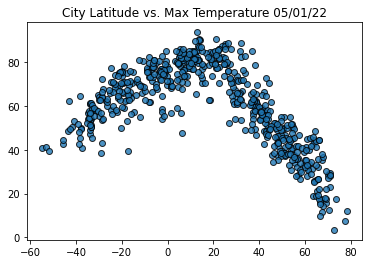

In [35]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Resources/Fig1.png")

# Show plot.
plt.show()

TypeError: 'str' object is not callable

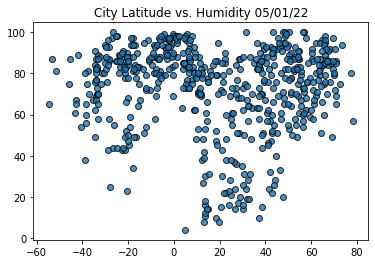

In [36]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

TypeError: 'str' object is not callable

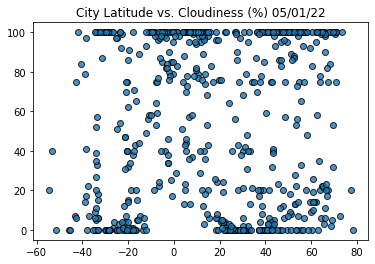

In [37]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

TypeError: 'str' object is not callable

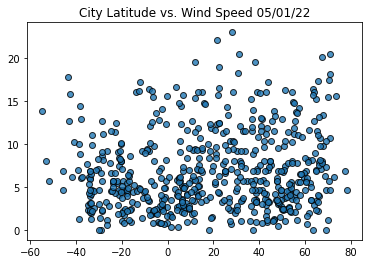

In [38]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [ ]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()



ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/tobix/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/df/c8lfmtln1tl1qt_rb9ych34w0000gn/T/ipykernel_43974/4107341288.py", line 2, in <module>
    from scipy.stats import linregress
  File "<frozen importlib._bootstrap>", line 983, in _find_and_load
  File "<frozen importlib._bootstrap>", line 963, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 906, in _find_spec
  File "<frozen importlib._bootstrap_external>", line 1280, in find_spec
  File "<frozen importlib._bootstrap_external>", line 1249, in _get_spec
  File "<frozen importlib._bootstrap_external>", line 1213, in _path_importer_cache
PermissionError: [Errno 1] Operation not permitted

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/tobix/opt/anacon